## New York City Taxi Data - Exploratory Data Analysis and Visualization

In [273]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium import plugins
import datetime
import math

from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation

In [2]:
PATH = '/Users/srivatsanramesh/Desktop/data'

In [3]:
train_data = pd.read_csv(os.path.join(PATH,'train_taxi.csv'))
test_data = pd.read_csv(os.path.join(PATH,'test_taxi.csv'))

In [4]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])

In [6]:
train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### There are no null-values in the dataset. It's time for visualization and understanding the nuances of data.
<br>
### From the statistical evidences, it's seen that almost 50 percent of the taxi drivers ride for a single passenger at a time and more than 50 percent of the trips last for atmost 10 minutes. This gives us a picture of the type of customers using these taxis

In [8]:
train_data.columns.values

array(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'], dtype=object)

In [9]:
unique_dates_pickup = train_data.pickup_datetime.dt.strftime('%d-%m-%y').unique()

In [10]:
unique_dates_drop = train_data.dropoff_datetime.dt.strftime('%d-%m-%y').unique()

In [11]:
unique_dates_pickup.shape,unique_dates_drop.shape

((182,), (183,))

In [12]:
train_data.loc[train_data['pickup_datetime'].dt.month == 1 ]['id'].count()

229707

In [13]:
month_data = []
for i in range(1,7):
    month_data.append(train_data.loc[train_data['pickup_datetime'].dt.month == i ]['id'].count())

<Container object of 6 artists>

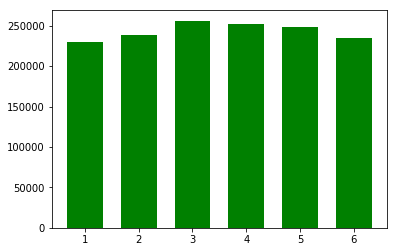

In [14]:
plt.bar(range(1,7),month_data,width=1/1.5,color='green')

### This is the distribution of number of trips for the months of January - June 2016.

In [15]:
weather_data = pd.read_csv(os.path.join(PATH,'weather_data.csv'))

In [16]:
weather_data = weather_data.rename(index=str,columns={'average temperature':"average_temperature"})
weather_data.head()

,date,maximum temperature,minimum temperature,average_temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [17]:
months = []

for i in range(1,7):
    month = []
    for j in range(1,32):
        month.append(train_data.loc[(train_data['pickup_datetime'].dt.month == i) & (train_data['pickup_datetime'].dt.day == j )]['id'].count())
    months.append(month)

In [18]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [213]:
minimum_weather = []
for i in range(1,7):
    temp = []
    for j in range(1,32):
        temp.append(weather_data.loc[(weather_data['date'].dt.month == i) & (weather_data['date'].dt.day == j )]['minimum temperature'].values)
    minimum_weather.append(temp)

In [214]:
maximum_weather = []
for i in range(1,7):
    temp = []
    for j in range(1,32):
        temp.append(weather_data.loc[(weather_data['date'].dt.month == i) & (weather_data['date'].dt.day == j )]['maximum temperature'].values)
    maximum_weather.append(temp)

In [216]:
average_weather = []
for i in range(1,7):
    temp = []
    for j in range(1,32):
        temp.append(weather_data.loc[(weather_data['date'].dt.month == i) & (weather_data['date'].dt.day == j )]['average_temperature'].values)
    average_weather.append(temp)

In [217]:
for i in range(6):
    for j in range(31):
        if len(minimum_weather[i][j]) != 0:
            minimum_weather[i][j] = minimum_weather[i][j][0]
        else:
            minimum_weather[i][j] = 0
            
for i in range(6):
    for j in range(31):
        if len(maximum_weather[i][j]) != 0:
            maximum_weather[i][j] = maximum_weather[i][j][0]
        else:
            maximum_weather[i][j] = 0
            
for i in range(6):
    for j in range(31):
        if len(average_weather[i][j]) != 0:
            average_weather[i][j] = average_weather[i][j][0]
        else:
            average_weather[i][j] = 0

<Container object of 31 artists>

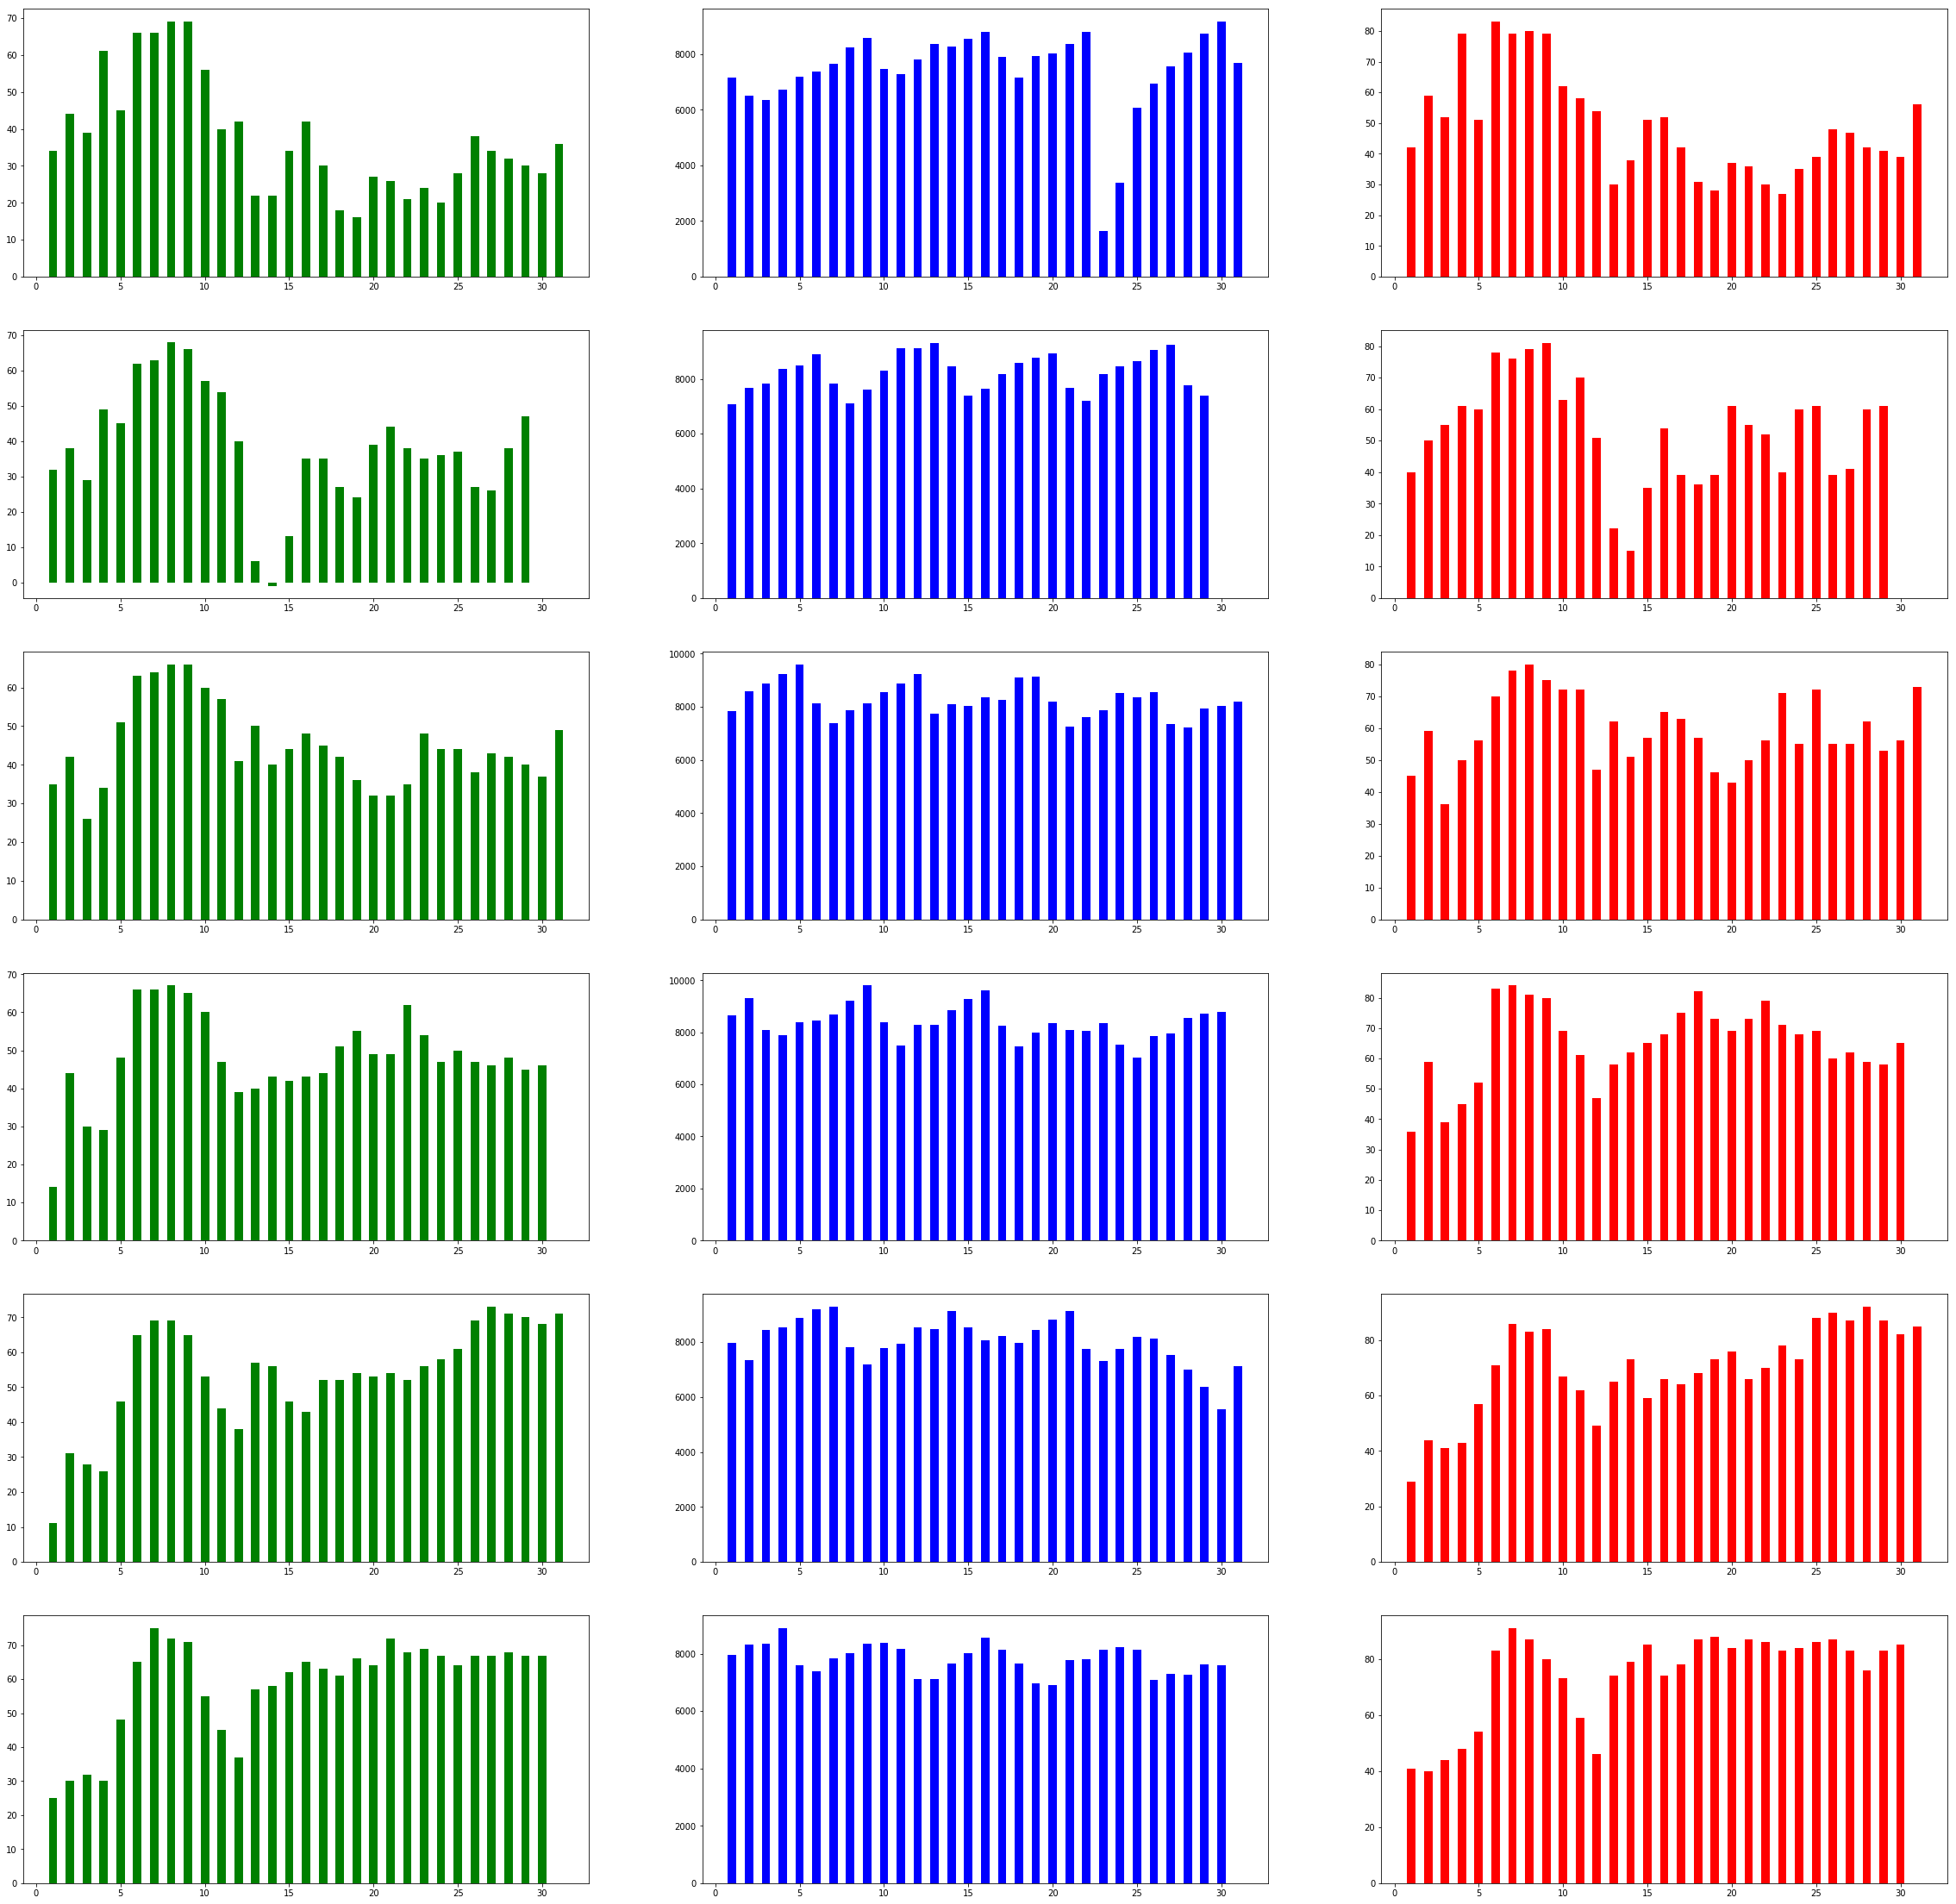

In [244]:
f = plt.figure(figsize=(40,40))
ax1 = f.add_subplot(6,3,1)
ax2 = f.add_subplot(6,3,2)
ax3 = f.add_subplot(6,3,3)

ax4 = f.add_subplot(6,3,4)
ax5 = f.add_subplot(6,3,5)
ax6 = f.add_subplot(6,3,6)

ax7 = f.add_subplot(6,3,7)
ax8 = f.add_subplot(6,3,8)
ax9 = f.add_subplot(6,3,9)

ax10 = f.add_subplot(6,3,10)
ax11 = f.add_subplot(6,3,11)
ax12 = f.add_subplot(6,3,12)

ax13 = f.add_subplot(6,3,13)
ax14 = f.add_subplot(6,3,14)
ax15 = f.add_subplot(6,3,15)

ax16 = f.add_subplot(6,3,16)
ax17 = f.add_subplot(6,3,17)
ax18 = f.add_subplot(6,3,18)

ax1.bar(range(1,32),minimum_weather[0],width = 1/2,color = 'green')
ax2.bar(range(1,32),months[0],width = 1/2,color = 'blue')
ax3.bar(range(1,32),maximum_weather[0],width = 1/2,color = 'red')

ax4.bar(range(1,32),minimum_weather[1],width = 1/2,color = 'green')
ax5.bar(range(1,32),months[1],width = 1/2,color = 'blue')
ax6.bar(range(1,32),maximum_weather[1],width = 1/2,color = 'red')

ax7.bar(range(1,32),minimum_weather[2],width = 1/2,color = 'green')
ax8.bar(range(1,32),months[2],width = 1/2,color = 'blue')
ax9.bar(range(1,32),maximum_weather[2],width = 1/2,color = 'red')

ax10.bar(range(1,32),minimum_weather[3],width = 1/2,color = 'green')
ax11.bar(range(1,32),months[3],width = 1/2,color = 'blue')
ax12.bar(range(1,32),maximum_weather[3],width = 1/2,color = 'red')

ax13.bar(range(1,32),minimum_weather[4],width = 1/2,color = 'green')
ax14.bar(range(1,32),months[4],width = 1/2,color = 'blue')
ax15.bar(range(1,32),maximum_weather[4],width = 1/2,color = 'red')

ax16.bar(range(1,32),minimum_weather[5],width = 1/2,color = 'green')
ax17.bar(range(1,32),months[5],width = 1/2,color = 'blue')
ax18.bar(range(1,32),maximum_weather[5],width = 1/2,color = 'red')

### There is little correlation between (max,min) temperature and no of trips made per day. Although, On Jan 23-24 2016 NY experienced the worst blizzard which accounts for the least number of trips on those days

In [227]:
weather_data.head()

,date,maximum temperature,minimum temperature,average_temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0.00,0.0,0
1,2016-02-01,40,32,36.0,0.00,0.0,0
2,2016-03-01,45,35,40.0,0.00,0.0,0
3,2016-04-01,36,14,25.0,0.00,0.0,0
4,2016-05-01,29,11,20.0,0.00,0.0,0


In [240]:
snow = []
for i in range(1,7):
    temp = []
    for j in range(1,32):
        temp.append(weather_data.loc[(weather_data['date'].dt.month == i) & (weather_data['date'].dt.day == j )]['snow fall'].values)
    snow.append(temp)
for i in range(6):
    for j in range(31):
        if len(snow[i][j]) != 0:
            snow[i][j] = snow[i][j][0]
        else:
            snow[i][j] = 0
snow = np.array([trip for month in snow for trip in month])

In [223]:
trips = np.array([trip for month in months for trip in month])
min_weather = np.array([temp for a in minimum_weather for temp in a])
max_weather = np.array([temp for a in maximum_weather for temp in a])
avg_weather = np.array([temp for a in average_weather for temp in a])

In [224]:
np.corrcoef(trips,min_weather)

array([[1.        , 0.29433988],
       [0.29433988, 1.        ]])

In [225]:
np.corrcoef(trips,max_weather)

array([[1.        , 0.35609807],
       [0.35609807, 1.        ]])

In [226]:
np.corrcoef(trips,avg_weather)

array([[1.        , 0.33054134],
       [0.33054134, 1.        ]])

### Max_weather has the highest correlation with no of trips although not very significant in terms of magnitude

In [34]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [110]:
train_data = train_data.drop([62744])

### Let's analyze the distribution of average trip duration Vs No of passengers

In [116]:
train_data = train_data.drop([433304,489613,824904])

In [119]:
train_data = train_data.drop([436047,826064])

In [120]:
distribution_count = train_data[['passenger_count','trip_duration']].groupby('passenger_count',as_index=False).mean().sort_values(by='trip_duration',ascending=False)

<Container object of 7 artists>

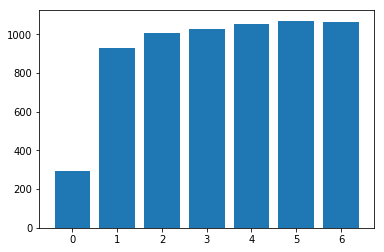

In [121]:
plt.bar(distribution_count['passenger_count'],distribution_count['trip_duration'])

In [122]:
distribution_count

,passenger_count,trip_duration
5,5,1070.232174
6,6,1061.355223
4,4,1053.529749
3,3,1028.236276
2,2,1005.458335
1,1,930.399753
0,0,291.610169


In [134]:
count = pd.DataFrame(columns=['passenger_count','No of trips'])
counts = []
for i in range(0,7):
    counts.append(train_data[train_data['passenger_count'] == i]['id'].count())

In [135]:
count['passenger_count'] = range(0,7)

In [136]:
count['No of trips'] = counts

In [137]:
count

,passenger_count,No of trips
0,0,59
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333


Text(0,0.5,'Average trip duration from Jan to Jun')

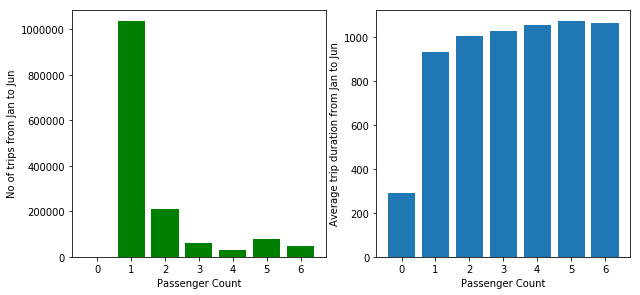

In [140]:
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2)

ax1.bar(count['passenger_count'],count['No of trips'],color='green')
ax1.set_xlabel('Passenger Count')
ax1.set_ylabel('No of trips from Jan to Jun')

ax2.bar(distribution_count['passenger_count'],distribution_count['trip_duration'])
ax2.set_xlabel('Passenger Count')
ax2.set_ylabel('Average trip duration from Jan to Jun')

### From this analysis, it is seen that when people travel alone, they tend to travel shorter distances when compared to travelling with a friend/family where taxis are hired for longer duration. Let's calculate the average distance travelled by each passenger_count for more detailed analysis

In [193]:
def distance(pickup_lat,pickup_long,drop_lat,drop_long):
    lat1, lon1 = pickup_lat,pickup_long
    lat2, lon2 = drop_lat,drop_long
    radius = 6371
    
    radians = np.vectorize(math.radians)
    sin = np.vectorize(math.sin)
    cos = np.vectorize(math.cos)
    tan = np.vectorize(math.atan2)
    sqrt = np.vectorize(math.sqrt)
    
    dlat = radians(lat2-lat1)
    dlon = radians(lon2-lon1)
    
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) \
        * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    
    c = 2 * tan(sqrt(a), sqrt(1-a))
    d = radius * c
    

    return d

In [194]:
dist = distance(np.array(train_data['pickup_latitude']),np.array(train_data['pickup_longitude']),np.array(train_data['dropoff_latitude']),np.array(train_data['dropoff_longitude']))

In [199]:
train_data['Distance'] = dist

In [200]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [202]:
average_distance = []
for i in range(0,7):
    average_distance.append(train_data[train_data['passenger_count'] == i]['Distance'].mean())


In [203]:
distance = pd.DataFrame(columns=['passenger_count','Distance'])
distance['passenger_count'] = range(0,7)
distance['Distance'] = average_distance

Text(0,0.5,'Average Distance travelled ')

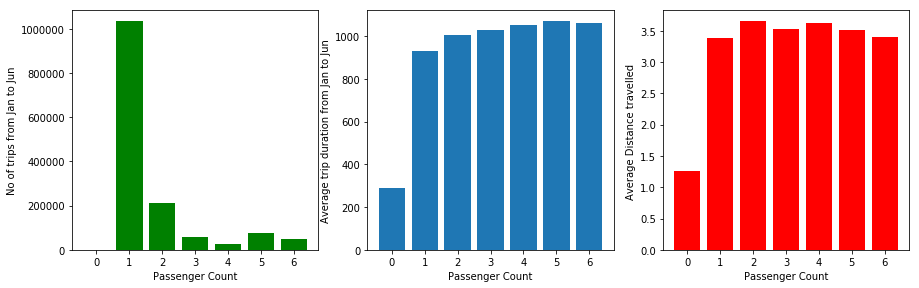

In [208]:
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(3,3,1)
ax2 = f.add_subplot(3,3,2)
ax3 = f.add_subplot(3,3,3)

ax1.bar(count['passenger_count'],count['No of trips'],color='green')
ax1.set_xlabel('Passenger Count')
ax1.set_ylabel('No of trips from Jan to Jun')

ax2.bar(distribution_count['passenger_count'],distribution_count['trip_duration'])
ax2.set_xlabel('Passenger Count')
ax2.set_ylabel('Average trip duration from Jan to Jun')

ax3.bar(distance['passenger_count'],distance['Distance'],color='red')
ax3.set_xlabel('Passenger Count')
ax3.set_ylabel('Average Distance travelled ')

In [294]:
coordinates = np.array(list(zip(train_data[train_data['passenger_count'] == 6]['pickup_latitude'],train_data[train_data['passenger_count'] == 6]['pickup_longitude'])))